In [81]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
H = 400
W = 400
f = 1200

In [83]:
rays_o = np.zeros((H*W, 3))
rays_d = np.zeros((H*W, 3))

In [84]:
u = np.arange(W)
v = np.arange(H)

In [85]:
u, v = np.meshgrid(u, v)

In [86]:
dirs = np.stack((u - W/2,
                 -(v - H/2),
                 -np.ones_like(u) * f), axis=-1)
rays_d = dirs / np.linalg.norm(dirs, axis=-1, keepdims=True)
rays_d = rays_d.reshape(-1, 3)

In [87]:
def plot_rays(o, d, t):

  fig = plt.figure(figsize=(12, 12))
  ax = fig.add_subplot(projection = '3d')

  pt1 = o
  pt2 = o + d * t

  for p1, p2 in zip(pt1, pt2):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]])

  plt.show()

In [88]:
# plot_rays(rays_o, rays_d, 1)

In [89]:
class Sphere():

  def __init__(self, p, r, c):
    self.p = p
    self.r = r
    self.c = c

  def intersect(self, o, d):

    a = d[:, 0]**2 + d[:, 1]**2 + d[:, 2]**2
    b = 2 * ((d[:, 0] * (o[:, 0] - self.p[0])) + (d[:, 1] * (o[:, 1] - self.p[1])) + (d[:, 2] * (o[:, 2] - self.p[2])))
    c = (o[:, 0] - self.p[0])**2 + (o[:, 1] - self.p[1])**2 + (o[:, 2] - self.p[2])**2 - self.r**2

    pho = b**2 - 4*a*c

    cond = pho >= 0

    num_rays = o.shape[0]
    colors = np.zeros((num_rays, 3))

    colors[cond] = self.c

    return colors

In [90]:
s = Sphere(np.array([0, 0, -1]), 0.1, np.array([1, 0, 0]))

In [91]:
c = s.intersect(rays_o, rays_d)

In [92]:
img = c.reshape(H, W, 3)

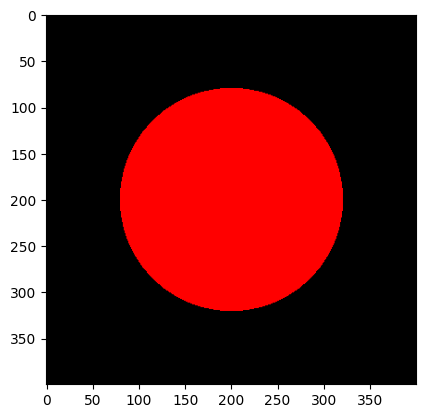

In [93]:
plt.imshow(img)